In [26]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [27]:

# Step 2: Load and Explore the Main Dataset
print("Loading and exploring the main yield dataset...")
yield_df = pd.read_csv('yield_df.csv')
print(f"Dataset shape: {yield_df.shape}")
print("\nFirst 5 rows:")
print(yield_df.head())
print("\nDataset info:")
print(yield_df.info())
print("\nMissing values:")
print(yield_df.isnull().sum())
print("\nBasic statistics:")
print(yield_df.describe())


Loading and exploring the main yield dataset...
Dataset shape: (28242, 8)

First 5 rows:
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dty

In [28]:

# Step 3: Data Cleaning & Preprocessing
print("\n=== DATA CLEANING ===")
# Drop unnecessary column
yield_df = yield_df.drop('Unnamed: 0', axis=1)
print("Dropped 'Unnamed: 0' column")

# Check for duplicates
duplicates = yield_df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")
if duplicates > 0:
    yield_df = yield_df.drop_duplicates()
    print("Duplicates removed")



=== DATA CLEANING ===
Dropped 'Unnamed: 0' column
Number of duplicates: 2310
Duplicates removed


In [29]:

# Check for missing values
print("Missing values after cleaning:")
print(yield_df.isnull().sum())


Missing values after cleaning:
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64



=== EXPLORATORY DATA ANALYSIS ===


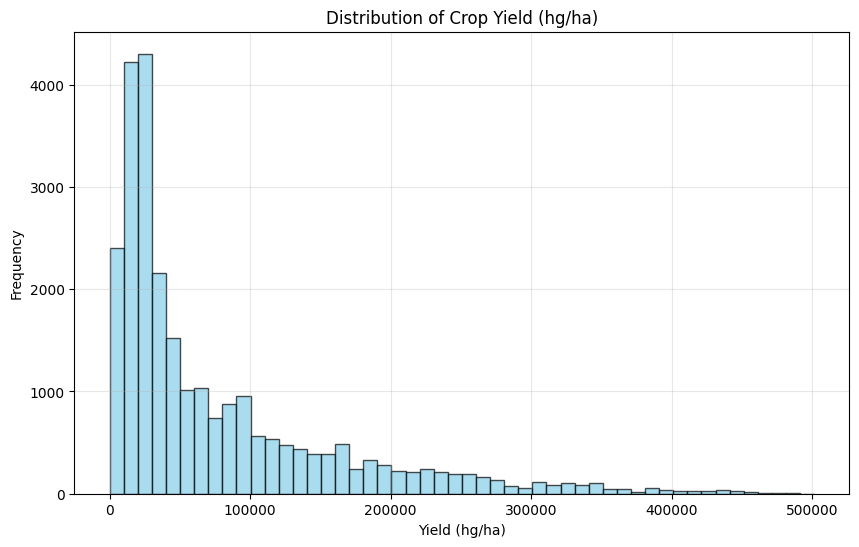

In [30]:

# Step 4: Exploratory Data Analysis (EDA)
print("\n=== EXPLORATORY DATA ANALYSIS ===")

# Set up the visualization style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Distribution of the target variable (yield)
plt.figure(figsize=(10, 6))
plt.hist(yield_df['hg/ha_yield'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Crop Yield (hg/ha)')
plt.xlabel('Yield (hg/ha)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()


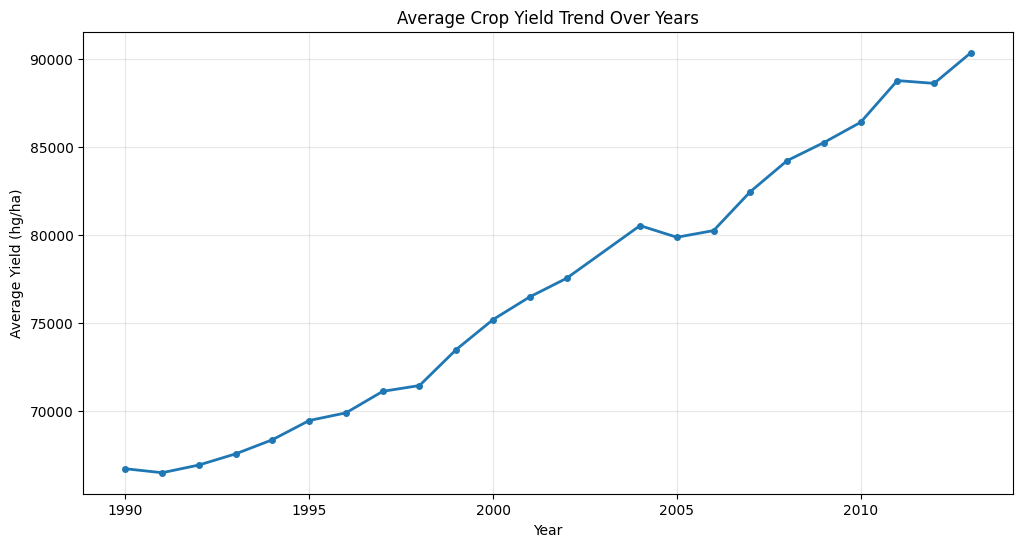

In [31]:

# 2. Yield trends over years
plt.figure(figsize=(12, 6))
yearly_yield = yield_df.groupby('Year')['hg/ha_yield'].mean()
plt.plot(yearly_yield.index, yearly_yield.values, marker='o', linewidth=2, markersize=4)
plt.title('Average Crop Yield Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Yield (hg/ha)')
plt.grid(alpha=0.3)
plt.show()


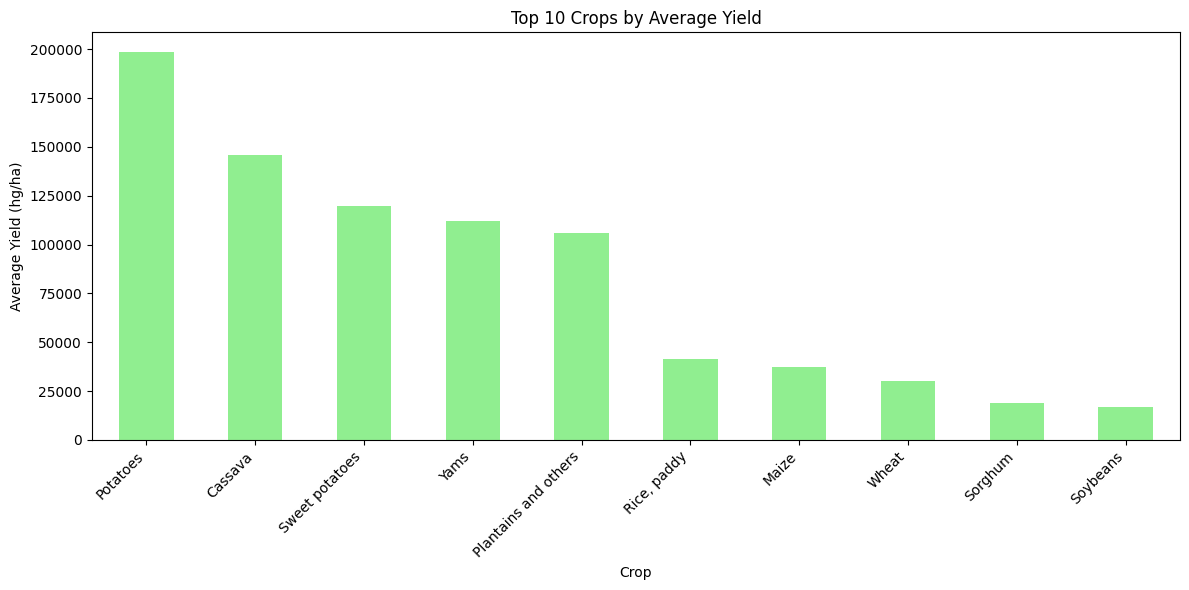

In [32]:

# 3. Top 10 crops by average yield
plt.figure(figsize=(12, 6))
top_crops = yield_df.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)
top_crops.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Crops by Average Yield')
plt.xlabel('Crop')
plt.ylabel('Average Yield (hg/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


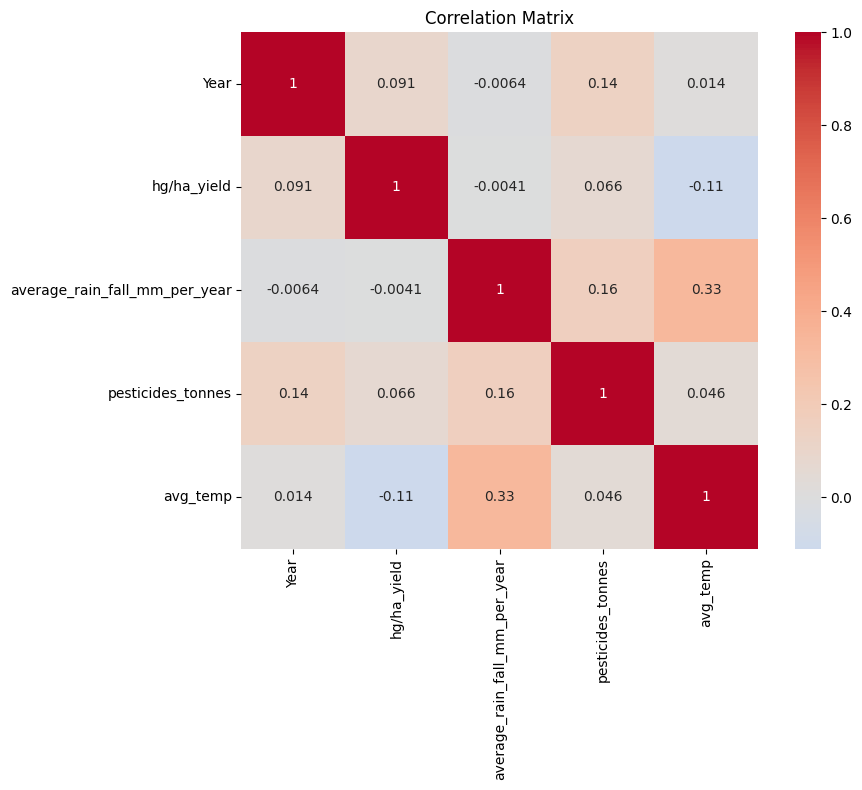

In [33]:

# 4. Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
correlation_matrix = yield_df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


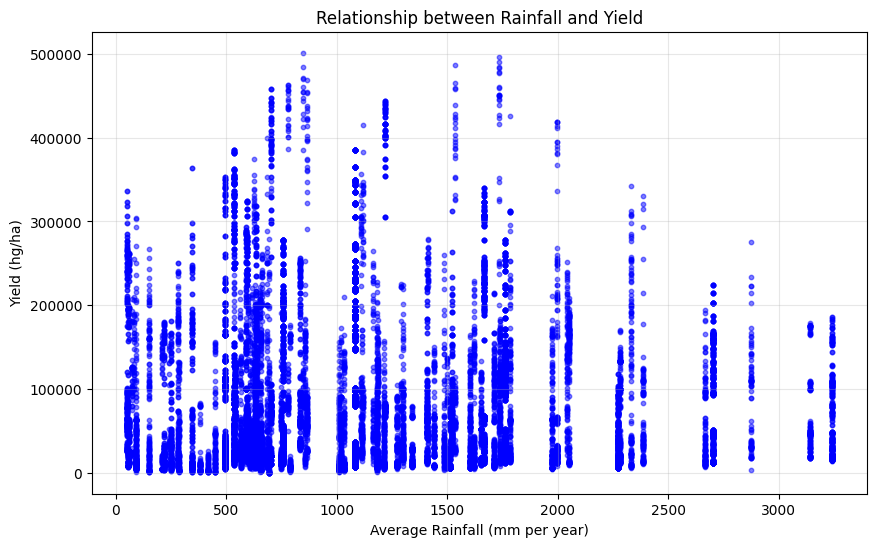

In [34]:

# 5. Relationship between rainfall and yield
plt.figure(figsize=(10, 6))
plt.scatter(yield_df['average_rain_fall_mm_per_year'], yield_df['hg/ha_yield'], 
            alpha=0.5, color='blue', s=10)
plt.title('Relationship between Rainfall and Yield')
plt.xlabel('Average Rainfall (mm per year)')
plt.ylabel('Yield (hg/ha)')
plt.grid(alpha=0.3)
plt.show()


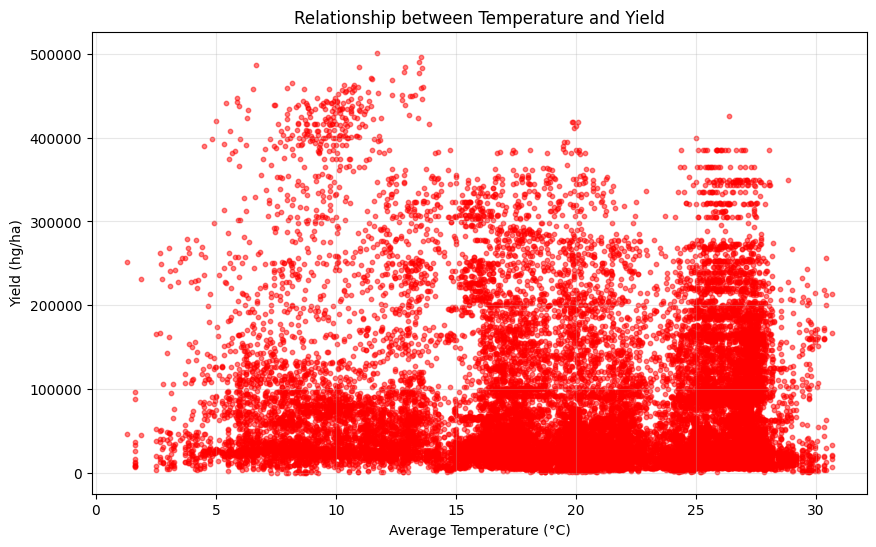

In [35]:

# 6. Relationship between temperature and yield
plt.figure(figsize=(10, 6))
plt.scatter(yield_df['avg_temp'], yield_df['hg/ha_yield'], 
            alpha=0.5, color='red', s=10)
plt.title('Relationship between Temperature and Yield')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Yield (hg/ha)')
plt.grid(alpha=0.3)
plt.show()


In [ ]:

# Step 5: Feature Engineering
print("\n=== FEATURE ENGINEERING ===")

# Encode categorical variables
label_encoder_area = LabelEncoder()
label_encoder_item = LabelEncoder()

yield_df['Area_Encoded'] = label_encoder_area.fit_transform(yield_df['Area'])
yield_df['Item_Encoded'] = label_encoder_item.fit_transform(yield_df['Item'])

print(f"Number of unique countries: {len(yield_df['Area'].unique())}")
print(f"Number of unique crops: {len(yield_df['Item'].unique())}")


=== FEATURE ENGINEERING ===
Number of unique countries: 101
Number of unique crops: 10


In [37]:

# Step 6: Prepare Data for Machine Learning
print("\n=== PREPARING DATA FOR ML ===")

# Define features and target
features = ['Area_Encoded', 'Item_Encoded', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
X = yield_df[features]
y = yield_df['hg/ha_yield']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



=== PREPARING DATA FOR ML ===
Features shape: (25932, 6)
Target shape: (25932,)
Training set: (20745, 6), (20745,)
Testing set: (5187, 6), (5187,)


In [38]:

# Step 7: Train Machine Learning Model
print("\n=== TRAINING RANDOM FOREST MODEL ===")

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

print("Model training completed!")



=== TRAINING RANDOM FOREST MODEL ===
Model training completed!


In [39]:

# Step 8: Make Predictions and Evaluate
print("\n=== MODEL EVALUATION ===")

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Model Performance Metrics ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")



=== MODEL EVALUATION ===
=== Model Performance Metrics ===
Mean Absolute Error (MAE): 4227.83
Mean Squared Error (MSE): 121479944.88
Root Mean Squared Error (RMSE): 11021.79
R-squared (R²): 0.9832


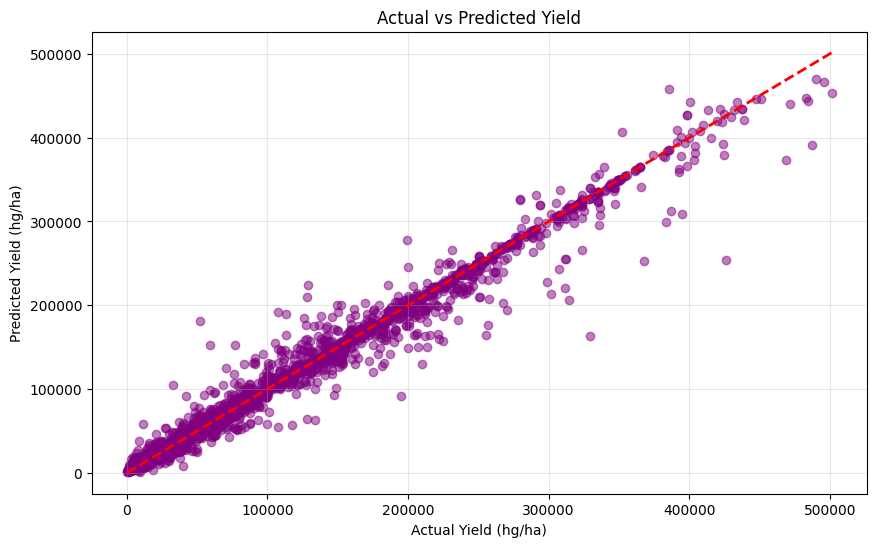

In [40]:

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs Predicted Yield')
plt.grid(alpha=0.3)
plt.show()


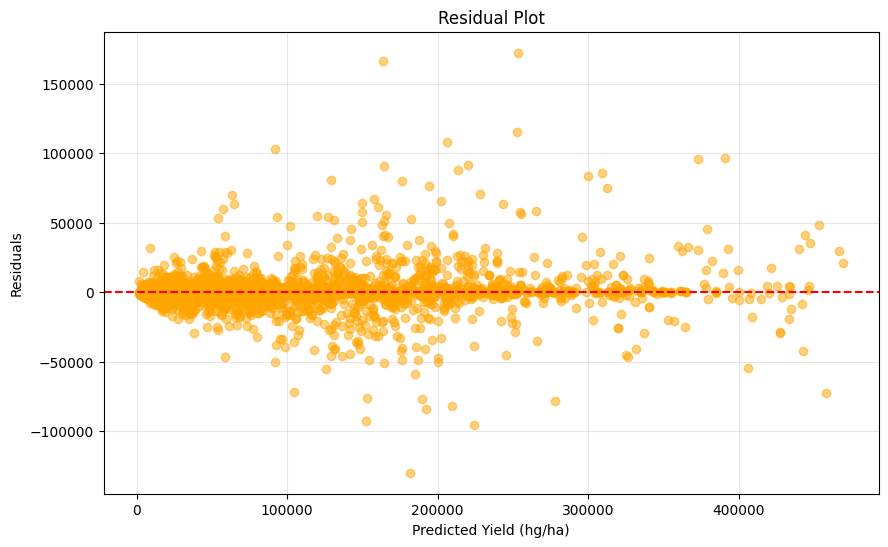

In [41]:

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield (hg/ha)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(alpha=0.3)
plt.show()



=== FEATURE IMPORTANCE ===
Feature Importance:
                         Feature  Importance
1                   Item_Encoded    0.598109
4              pesticides_tonnes    0.118280
5                       avg_temp    0.102804
3  average_rain_fall_mm_per_year    0.080802
0                   Area_Encoded    0.068991
2                           Year    0.031013


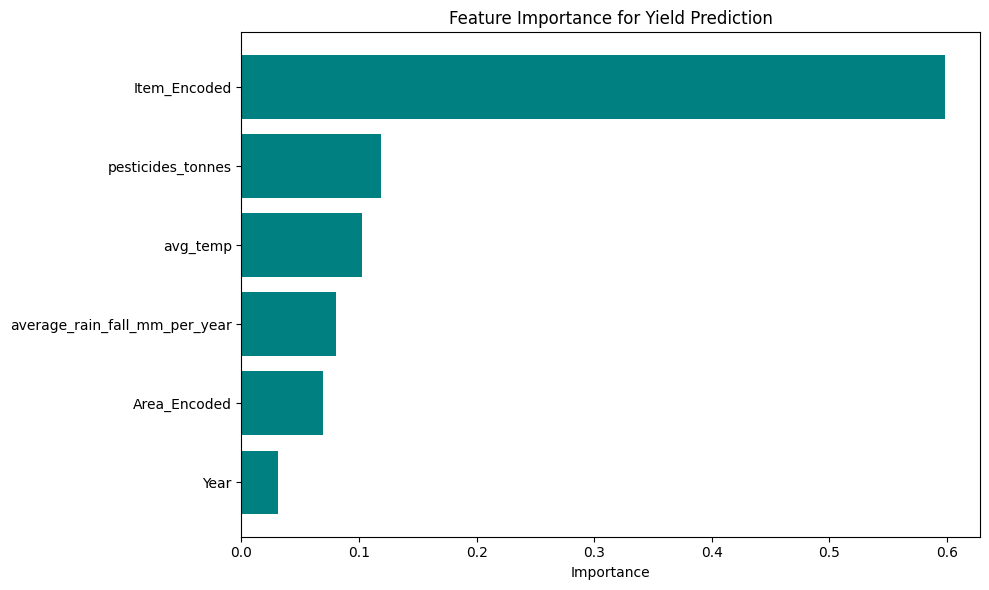

In [42]:

# Step 9: Feature Importance
print("\n=== FEATURE IMPORTANCE ===")

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance for Yield Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [43]:

# Step 10: Make Sample Predictions
print("\n=== SAMPLE PREDICTIONS ===")

# Get some sample data from test set
sample_indices = X_test.sample(5, random_state=42).index
sample_data = yield_df.loc[sample_indices]

for idx, row in sample_data.iterrows():
    actual_yield = row['hg/ha_yield']
    features_for_pred = row[['Area_Encoded', 'Item_Encoded', 'Year', 
                           'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].values.reshape(1, -1)
    features_scaled = scaler.transform(features_for_pred)
    predicted_yield = model.predict(features_scaled)[0]
    
    print(f"\nCountry: {row['Area']}, Crop: {row['Item']}, Year: {row['Year']}")
    print(f"Actual Yield: {actual_yield:.0f} hg/ha")
    print(f"Predicted Yield: {predicted_yield:.0f} hg/ha")
    print(f"Error: {abs(actual_yield - predicted_yield):.0f} hg/ha")



=== SAMPLE PREDICTIONS ===

Country: Brazil, Crop: Yams, Year: 1993
Actual Yield: 91471 hg/ha
Predicted Yield: 91470 hg/ha
Error: 1 hg/ha

Country: Suriname, Crop: Plantains and others, Year: 2002
Actual Yield: 237531 hg/ha
Predicted Yield: 249312 hg/ha
Error: 11781 hg/ha

Country: India, Crop: Sweet potatoes, Year: 1991
Actual Yield: 83453 hg/ha
Predicted Yield: 83453 hg/ha
Error: 0 hg/ha

Country: South Africa, Crop: Rice, paddy, Year: 2009
Actual Yield: 25612 hg/ha
Predicted Yield: 25540 hg/ha
Error: 72 hg/ha

Country: India, Crop: Rice, paddy, Year: 1995
Actual Yield: 26972 hg/ha
Predicted Yield: 27015 hg/ha
Error: 43 hg/ha


In [44]:

# Step 11: Save the Model (Optional)
print("\n=== SAVING THE MODEL ===")

import joblib

# Save the model and preprocessing objects
joblib.dump(model, 'yield_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder_area, 'label_encoder_area.pkl')
joblib.dump(label_encoder_item, 'label_encoder_item.pkl')

print("Model and preprocessing objects saved successfully!")
print("Files created: yield_prediction_model.pkl, scaler.pkl, label_encoder_area.pkl, label_encoder_item.pkl")

print("\n=== ANALYSIS COMPLETE ===")


=== SAVING THE MODEL ===
Model and preprocessing objects saved successfully!
Files created: yield_prediction_model.pkl, scaler.pkl, label_encoder_area.pkl, label_encoder_item.pkl

=== ANALYSIS COMPLETE ===
